In [20]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from autosklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import glob
import re
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20, 15)
from autosklearn.regression import AutoSklearnRegressor
print('autosklearn: %s' % autosklearn.__version__)

train = pd.read_csv('../data/train.csv', index_col='date')
test = pd.read_csv('../data/test.csv', index_col='date')

autosklearn: 0.12.6


In [21]:
y_train = train.reel
X_train = train.drop(['reel'], axis=1)
y_test = test.reel
X_test = test.drop(['reel'], axis=1)
X_train.head()

,prevision,cantine_nom,annee_scolaire,effectif,quartier_detail,prix_quartier_detail_m2_appart,prix_moyen_m2_appartement,prix_moyen_m2_maison,longitude,latitude,...,depuis_juives,ramadan_dans,depuis_ramadan,year,day_of_week_sin,day_of_year_sin,day_of_year_cos,week_sin,freq_reel_%,freq_reel_%_std
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.595434,-1.012799,1.087871,-0.269910,-1.091116,-0.653145,-0.408288,-1.120297,0.774209,2.055271,...,-1.301284,0.74085,-1.461039,-1.563869,-0.019917,-0.074069,1.239323,0.015887,-0.399624,-0.714641
2011-01-03,-0.823041,0.207852,-1.222780,-0.680289,0.488899,1.918779,2.339611,0.535862,0.036838,-0.863408,...,-1.301284,0.74085,-1.461039,-1.563869,-0.019917,-0.074069,1.239323,0.015887,-0.082909,1.511968
2011-01-03,1.330463,-0.141474,-0.372606,-0.924563,0.678924,-0.497418,-0.675882,0.238929,-0.720356,-1.375554,...,-1.301284,0.74085,-1.461039,-1.563869,-0.019917,-0.074069,1.239323,0.015887,1.619386,-0.287836
2011-01-03,0.427796,-0.943218,-1.222780,1.127335,0.592007,-0.035104,-0.212652,0.238929,0.139911,-0.048381,...,-1.301284,0.74085,-1.461039,-1.563869,-0.019917,-0.074069,1.239323,0.015887,-1.031682,-0.927143
2011-01-03,1.382043,3.352224,1.706113,-1.002730,-0.686414,1.750886,0.790264,1.196421,0.655278,-0.086929,...,-1.301284,0.74085,-1.461039,-1.563869,-0.019917,-0.074069,1.239323,0.015887,1.718052,-0.139540


Auto-Sklearn est une bibliothèque open-source permettant d'effectuer de l'apprentissage automatique en Python. Elle utilise la populaire bibliothèque d'apprentissage automatique Scikit-Learn pour les transformations de données et les algorithmes d'apprentissage automatique, ainsi qu'une procédure de recherche par optimisation bayésienne pour découvrir efficacement le pipeline de modèles le plus performant pour un ensemble de données donné.

Preprocessing in auto-sklearn is divided into two parts: 

- Data preprocessing includes One-Hot encoding of categorical features, imputation of missing values and the normalization of features or samples. These steps currently cannot be turned off. 
- Feature preprocessing is a single transformer which implements for example feature selection or transformation of features into a different space (i.e. PCA). This can be turned off by setting include_preprocessors=["no_preprocessing"].

In [22]:
model = AutoSklearnRegressor(
    time_left_for_this_task=3600, metric=mean_squared_error,
    scoring_functions=[mean_squared_error], resampling_strategy='holdout',
    resampling_strategy_arguments={'train_size': 0.80}, n_jobs=-1)

model.fit(X_train, y_train, dataset_name='canteen_attendance')

/home/quentin/.local/lib/python3.6/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46171 instead
  http_address["port"], self.http_server.port


AutoSklearnRegressor(metric=mean_squared_error, n_jobs=-1,
                     per_run_time_limit=2880,
                     resampling_strategy_arguments={'train_size': 0.8},
                     scoring_functions=[mean_squared_error])

In [23]:
## check statistics
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: canteen_attendance
  Metric: mean_squared_error
  Best validation score: 0.218353
  Number of target algorithm runs: 77
  Number of successful target algorithm runs: 39
  Number of crashed target algorithm runs: 8
  Number of target algorithms that exceeded the time limit: 16
  Number of target algorithms that exceeded the memory limit: 14



In [24]:
print(model.show_models())

[(0.860000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'extra_trees', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'friedman_mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.9806246839879327, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_decrease': 0.0, 'regressor:extra_trees:min_samples_leaf': 11, 'regressor:extra_trees:min_samples_split': 7, 'regressor:extra_trees:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multioutput': False,
  'target_t

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def print_metrics(y_true, y_predicted):

    print('Root Mean Square Error            = ' +
          str(np.sqrt(mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error               = ' +
          str(mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error             = ' +
          str(median_absolute_error(y_true, y_predicted))) 

y_pred = model.predict(X_test)
print_metrics(y_test**2, y_pred**2)

Root Mean Square Error            = 28.505479212496727
Mean Absolute Error               = 20.424114102513297
Median Absolute Error             = 14.912485658699218


On constate que le modèle d'autoML en question ne bat pas le light GBM de référence (rmse=22).

Cela dit, il peut être intéressant de run ce modèle sur un dataset vierge de tout processing afin de voir la force de l'auto ML par rapport à un processing humain.

De plus, j'ai volontairement limité l'algorithme à 60 minutes de calcul. Il est fort probable qu'un dataset volumineux nécessite plus de temps pour teste de nombreux processing et modèles. Ici, l'agorithme a conduit 39 modèles à terme.

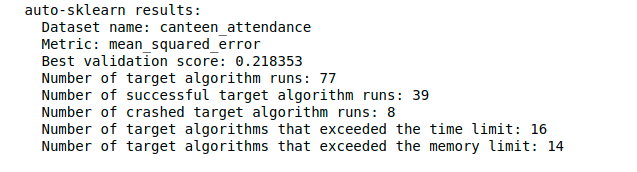

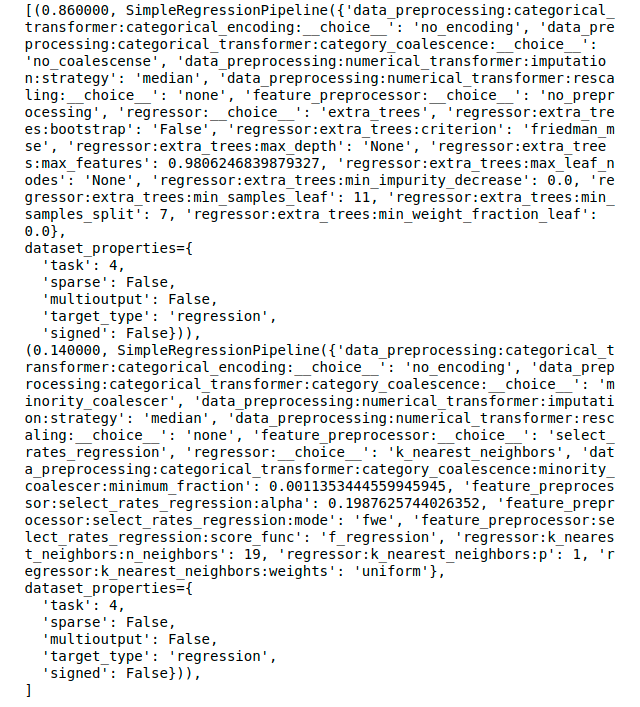